In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
red_wine=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\Wine Quality Analysis\winequality-red.csv',sep=';')
white_wine=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\Wine Quality Analysis\winequality-white.csv',sep=';')

In [9]:
red_wine.shape

(1599, 12)

In [10]:
white_wine.shape

(4898, 12)

In [11]:
red_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [12]:
white_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [14]:
sum(red_wine.duplicated())

240

In [15]:
red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [17]:
a=np.repeat('red',red_wine.shape[0])
b=np.repeat('white',white_wine.shape[0])

To repeat 'red' and 'white' in the entire length of dataset

In [22]:
red_wine['color']=a
white_wine['color']=b


In [23]:
wine_df=red_wine.append(white_wine)

In [24]:
wine_df.shape

(6497, 13)

In [25]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
wine_df.to_csv('wine.csv',index=False)

Keeping index as false ,we get rid of the unwanted indexing

In [28]:
df=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\Wine Quality Analysis\wine.csv')

In [31]:
df.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


# EDA

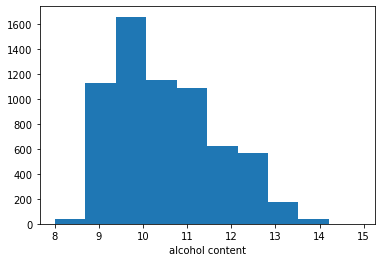

In [45]:
plt.hist(df['alcohol']);
plt.xlabel('alcohol content');

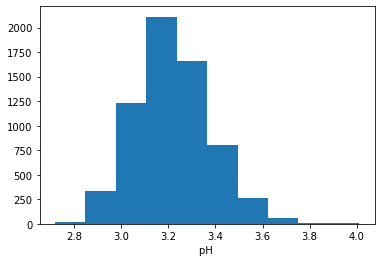

In [46]:
plt.hist(df['pH']);
plt.xlabel('pH ');

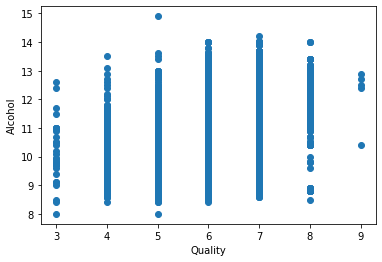

In [47]:
plt.scatter(df['quality'],df['alcohol']);
plt.xlabel('Quality');
plt.ylabel('Alcohol');

In [48]:
df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

####  Quality of white color wine is better than red color wine

#### What level of acidity receives the highest average rating?

In [53]:
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [55]:
bin_edges=[2.72,3.11,3.21,3.32,4.01]    # to cut data into groups
bin_names=['low','med','mod_high','high']    # one less than bin_edges

In [56]:
df['acidity_levels']=pd.cut(df['pH'],bin_edges,labels=bin_names)

In [58]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,high
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,med


In [63]:
df.groupby('acidity_levels')['quality'].mean()

acidity_levels
low         5.783343
med         5.784540
mod_high    5.850832
high        5.859593
Name: quality, dtype: float64

#### Quality as per acidity level

In [65]:
df.to_csv('wine.csv', index=False) # to save the new changes in csv form 

#### Do wines with higher alcoholic content receive better ratings?

In [67]:
df['alcohol'].median()

10.3

In [69]:
low_alcohol=df.query('alcohol < 10.3')
high_alcohol=df.query('alcohol >= 10.3')

In [111]:
a=low_alcohol['quality'].mean()
b=high_alcohol['quality'].mean()
print(a)
print(b)

5.475920679886686
6.146084337349397


####  Therefore,Higher content Alcohol as more quality 

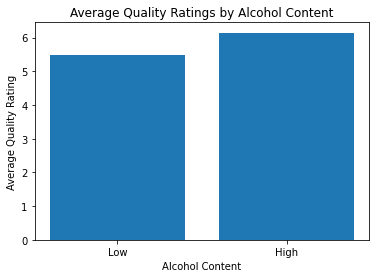

In [112]:
locations = [1, 2]
heights = [a,b]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

In [77]:
low_alcohol.groupby('color')['quality'].mean()


color
red      5.324228
white    5.530621
Name: quality, dtype: float64

#### Do sweeter wines receive better ratings?

In [96]:
df['residual sugar'].median()

3.0

In [108]:
low_sugar=df[df['residual sugar'] < 3.0]
high_sugar=df[df['residual sugar'] >= 3.0]
            

In [113]:
c=low_sugar['quality'].mean()
d=high_sugar['quality'].mean()
print(c)
print(d)

5.808800743724822
5.82782874617737


Text(0, 0.5, 'Quality')

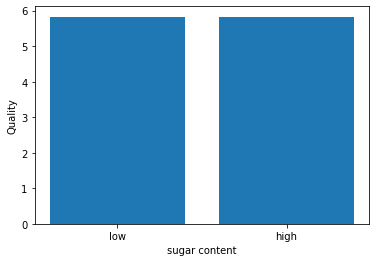

In [114]:
X=[1,2]
Y=[c,d]
labels=['low','high']
plt.bar(X,Y,tick_label=labels)
plt.xlabel('sugar content')
plt.ylabel('Quality')

#### Plotting Wine Type and Quality with Matplotlib

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total no. of red samples
2. White bar proportions = counts for each quality rating / total no. of white samples

In [119]:
color_total=df.groupby('color').count()['pH']
color_total

color
red      1599
white    4898
Name: pH, dtype: int64

In [121]:
color_count=df.groupby(['color','quality']).count()['pH']
color_count

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [123]:
red_proportions = color_count['red'] / color_total['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [124]:
white_proportions = color_count['white'] / color_total['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [134]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars
ind1 = np.arange(len(white_proportions)) 

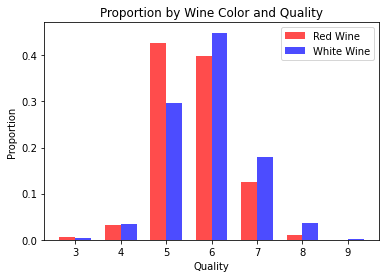

In [135]:
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind1 + width, white_proportions, width, color='b', alpha=.7, label='White Wine')

plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()
